# Regression with Gradient decent

สร้างข้อมูลโดยให้ x และ y มีความพันธ์ดังสมมการ $y = -2x^2+50x-150+noise$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; โดยที่  $noise \sim N(0,20)$

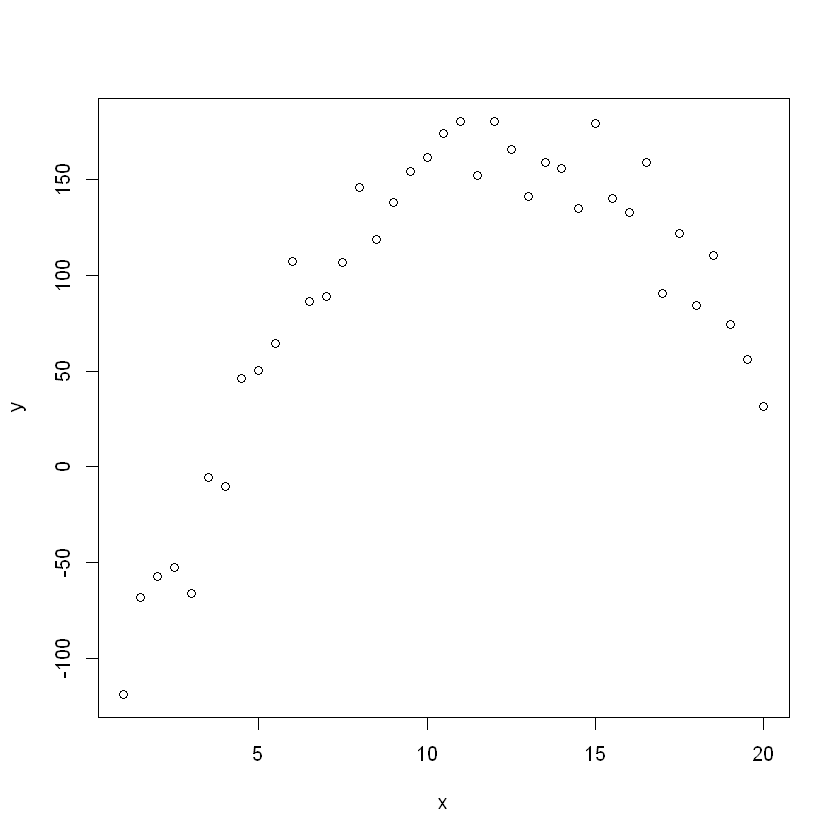

In [1]:
#Linear Regression ####
#generate data
x <- seq(1,20, by=0.5)
noise <- rnorm(length(x), mean=0, sd=20)
y <- -2*x^2+50*x-150+noise #you can remove noise if you want to test with perfect data
plot(x,y)
x_sq <- x^2

จะให้ได้ว่าเป็นความสัมพันธ์แบบ quardraic จึงต้องสร้างตัวแปร x_sq เพื่อใช้นแบบจำลอง regression จากนั้นรวมตัวแปรอิสระไว้ด้วยกันในตัวแปร feat ตัวแปรตาม res

In [2]:
#data
feat <- cbind(x,x_sq)
res <- y

สร้างฟังก์ชัน regression ที่ประมาณการค่าสัมประสิทธิด้วยวิธี Gradient descent

In [10]:
reg <- function(X,y, alpha=0.0001, iter=2000) {
  #as.metrix
  X <- cbind(rep(1,nrow(X)),X)
  colnames(X)[1] <- "x0"
  X <- as.matrix(X)
  Y <- as.matrix(y)
  
  #init
  Theta <- matrix(rnorm(ncol(X)), nrow=ncol(X))
  err <- 0
  m <- nrow(X)
  for(i in 1:iter){
    #model
    h <- X %*% Theta
    
    #cost
    J <- sum((h-Y)^2)/(2*m)
    err[i] <- J
    if (i %% 500 == 0){cat("iteration",i,"error =",J,"\n")} #you can disable print with comment
    
    #gradient
    dJ <- colSums(as.vector(h-Y)*X)/m
    
    #update
    Beta <- Theta-alpha*dJ
    Theta <- Beta
  }
  plot(err,type="l", xlab="iteration", ylab="loss", main="loss during iteration")
  rownames(Theta) <- paste0("Theta", 0:(ncol(X)-1))
  result <- list(coefs = Theta, yhat = h)
  return(invisible(result))
}

# Train

เริ่มเทรนแบบจำลอง โดยกดหนด learning rate ที่ 0.00005 จำนวนการเทรน 1 ล้านรอบ  
(อาจจะใช้เวลาประมาณ 1 นาที ขึ่้นอยู่กับ CPU, run ใน RStudio จะดูง่ายกว่า)

iteration 500 error = 2571.188 
iteration 1000 error = 2112.401 
iteration 1500 error = 1820.61 
iteration 2000 error = 1634.411 
iteration 2500 error = 1514.981 
iteration 3000 error = 1437.772 
iteration 3500 error = 1387.265 
iteration 4000 error = 1353.648 
iteration 4500 error = 1330.715 
iteration 5000 error = 1314.545 
iteration 5500 error = 1302.656 
iteration 6000 error = 1293.482 
iteration 6500 error = 1286.03 
iteration 7000 error = 1279.674 
iteration 7500 error = 1274.017 
iteration 8000 error = 1268.808 
iteration 8500 error = 1263.89 
iteration 9000 error = 1259.161 
iteration 9500 error = 1254.559 
iteration 10000 error = 1250.042 
iteration 10500 error = 1245.587 
iteration 11000 error = 1241.176 
iteration 11500 error = 1236.8 
iteration 12000 error = 1232.453 
iteration 12500 error = 1228.129 
iteration 13000 error = 1223.826 
iteration 13500 error = 1219.543 
iteration 14000 error = 1215.279 
iteration 14500 error = 1211.033 
iteration 15000 error = 1206.804 
itera

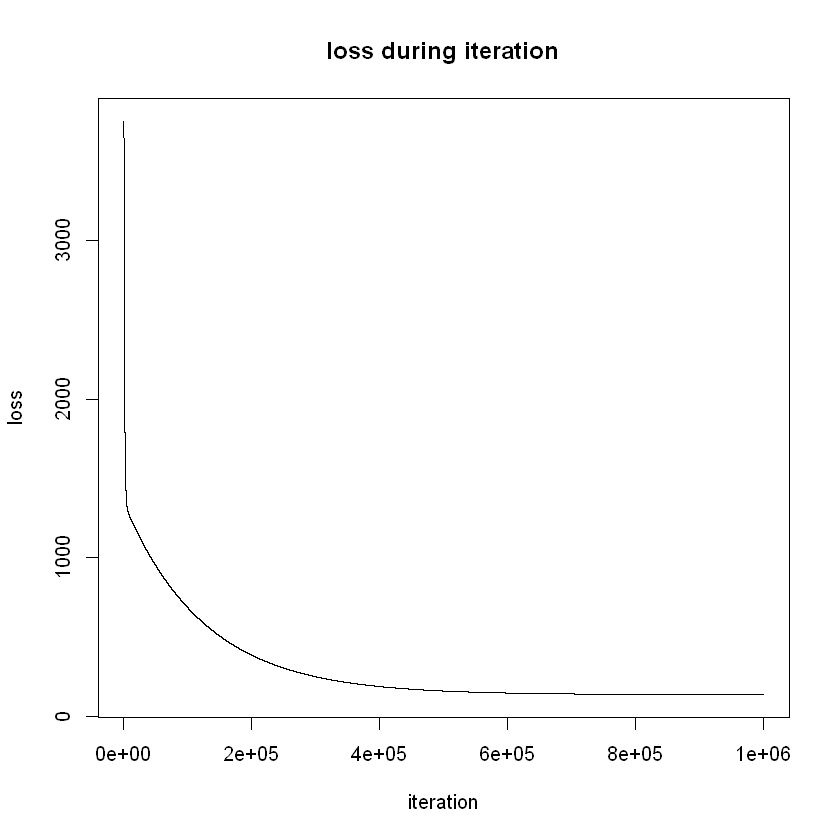

In [11]:
model1 <- reg(feat,res, alpha=0.00005, iter=1e6)

ค่าสัมประสิทธิที่ได้จาก train ด้วย gradient descent

In [12]:
model1$coefs

Theta0,-165.307244
Theta1,53.514901
Theta2,-2.158303


พล็อตเส้นที่ได้จากการประมาณค่ากับข้อมูล

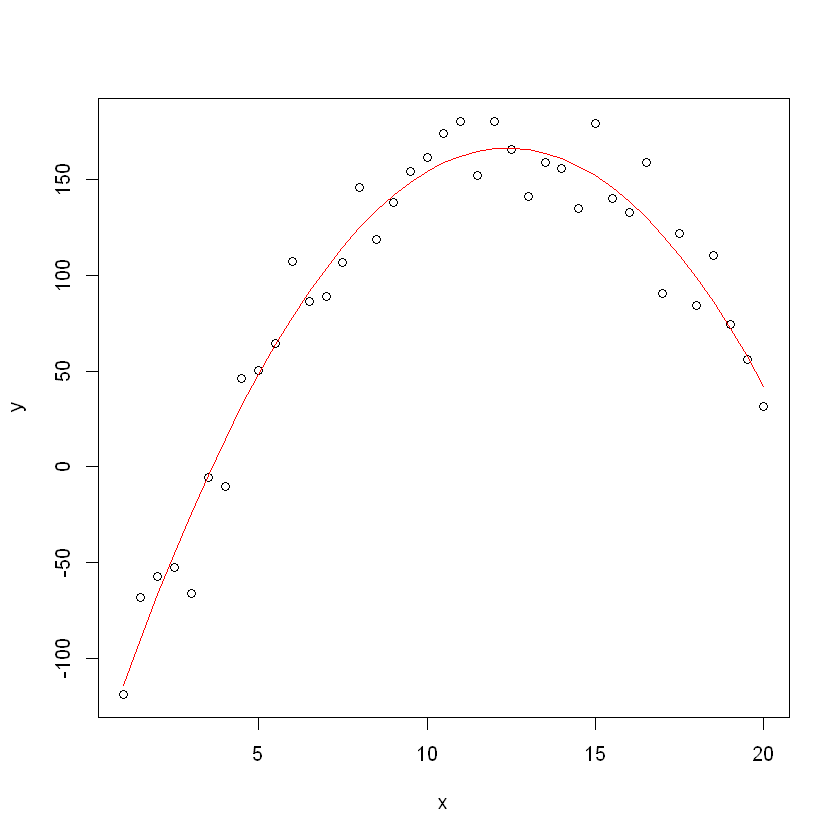

In [13]:
plot(x,y)
lines(x, model1$yhat, col="red")

แบบเทียบค่าสัมประสิทธิกับวิธี Normal Equation ซึ่งค่าสัมประสิทธิจะเท่ากับ $Theta = (XX)'X'y$

In [15]:
#Normal Equation ####
require(MASS)
X_one <- cbind(rep(1,length(x)),feat)
colnames(X_one)[1] <- "x0"
X_one <- as.matrix(X_one)
theta <- ginv(t(X_one) %*% X_one) %*% t(X_one) %*% y
rownames(theta) <- paste0("Theta", 0:(ncol(X_one)-1))
theta

Theta0,-168.616654
Theta1,54.170106
Theta2,-2.185301


In [16]:
model1$coefs

Theta0,-165.307244
Theta1,53.514901
Theta2,-2.158303


หากจำนวนรอบการ train มากกว่านี้จะได้ค่าที่ใกล้เคียงยิ่งขึ้น